In [72]:
#Note: Insert 0 in other all_guard file so all birds start at time 0 


example2<-read.csv("example_times2", header=FALSE,sep=",")
print(example2)

for(i in 1:length(example2[,2])) {
    temp=example2[i,]
    temp2<-temp[!is.na(temp)]
    start<-temp2[1:(length(temp2)-1)]
    end<-temp2[2:length(temp2)]
    assign(paste("birdstart",i,sep=""),start)
    assign(paste("birdend",i,sep=""),end)

    }


print(birdstart2)
print(birdend2)





         V1        V2       V3       V4       V5       V6       V7        V8
1 0.8838345 1.8445583 2.538591 3.564447 4.732959 5.830602 8.541057  8.635894
2 0.7763433 2.2569802 2.803995 3.048745 4.303508 5.013082 5.996045 10.116183
3 0.5930331 2.8980031 3.465606 0.000000 4.821111 6.516213 7.167541  8.835344
4 0.3343880 0.8394135 1.107062 2.554057 3.272874 3.451642 3.841980  4.111537
         V9       V10       V11      V12      V13       V14      V15 V16
1  8.849343  9.160642  9.325690 9.342302 9.575545 10.745332 11.05489  12
2 12.000000        NA        NA       NA       NA        NA       NA  NA
3  9.268219 11.240789 12.000000       NA       NA        NA       NA  NA
4  4.884393  8.268975  8.399035 8.448020 8.458105  9.644259 12.00000  NA
[1]  0.7763433  2.2569802  2.8039950  3.0487446  4.3035081  5.0130821  5.9960452
[8] 10.1161834
[1]  2.256980  2.803995  3.048745  4.303508  5.013082  5.996045 10.116183
[8] 12.000000


Warning message in data.table(Set = c(rep(c("bower", "forage"), length(birdstart1)/2)), :
“Item 1 is of size 14 but maximum size is 15 (recycled leaving remainder of 1 items)”Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”

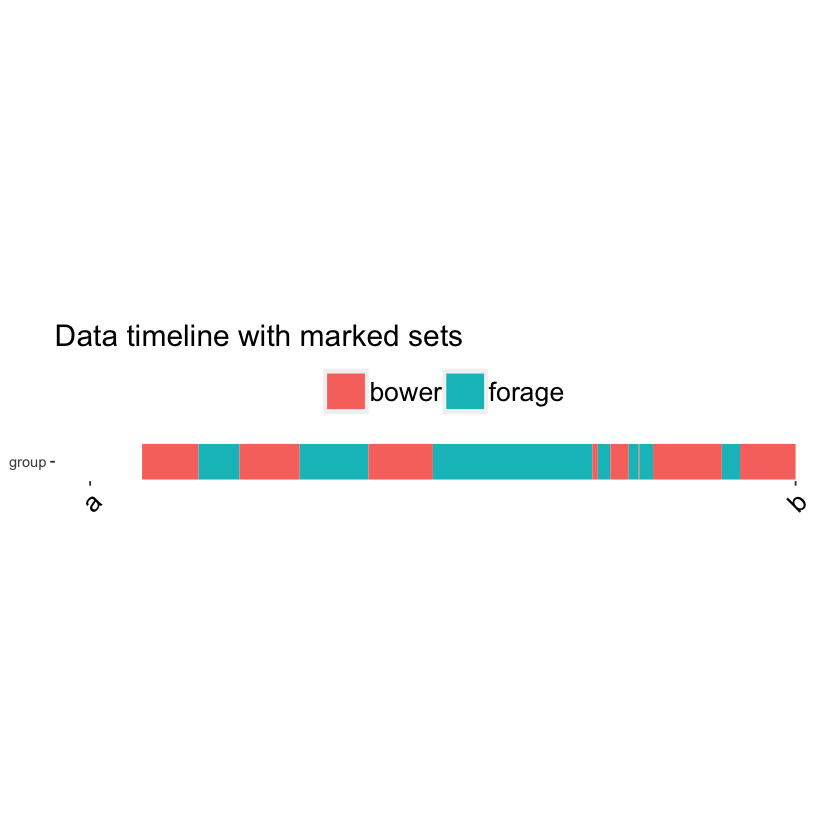

In [74]:
require(data.table)
require(ggplot2)
require(grid)

#Instead of creating setsTimeline, import our data
setsTimeline <- data.table(Set=c(rep(c("bower","forage"),length(birdstart1)/2)),
                           StartDate= birdstart1,
                           EndDate= birdend1
                          )

#add in labels based on mating
#setsTimeline[,StartLabel:=as.POSIXct(StartDate,tz="UTC",origin="1970-01-01")]

#add in breaks from 
breaks <- c(0,12)
labels <- c("a","b")

ggplot(setsTimeline, aes(colour=Set)) + 
  geom_segment(aes(x=StartDate, xend=EndDate, y="group", yend="group"), size=10) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        aspect.ratio=5e-02, 
        axis.text.x = element_text(colour='black', angle = 45, size = 16, hjust = 1, vjust = 1),
        legend.text = element_text(colour='black', size = 16),
        legend.title = element_text(colour='black', size = 0),
        legend.position = 'top',
        plot.title = element_text(colour='black', size = 18),
        panel.margin = unit(1, "cm")) +
  xlab(NULL) + 
  ylab(NULL) +
  ggtitle("Data timeline with marked sets") +
  coord_cartesian(xlim = c(0,12), ylim = NULL) +
  scale_x_continuous(breaks=breaks,labels=labels)